In [9]:
import csv_loader as loader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from hijri_converter import convert as hijri_convert
from pyluach import dates as hebrew_convert
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [10]:
# Import Datasets
terrorism = loader.get_csv_file('terrorism')
wars = loader.get_csv_file('israeli_wars')
islam_holidays = loader.get_csv_file('islam_holidays')
jewish_holidays = loader.get_csv_file('jewish_holidays')
prime_ministers = loader.get_csv_file('prime_ministers')
pales_national_days = loader.get_csv_file('pales_national_days')

In [11]:
# Reused code

# Terror attacks in israel
countries = ['West Bank and Gaza Strip', 'Israel']
israel_attacks = terrorism[(terrorism['country_txt'].isin(countries)) & (terrorism['provstate'] != 'Gaza Strip')].copy()

# Timeframe colors
tf_colors = ['#3561A7', '#7F4D7E', '#FFA500', '#8F6957', '#4C8B77', '#A64F63', '#3A6FA6', '#8E7B4A', '#6F64A3', '#A08263']

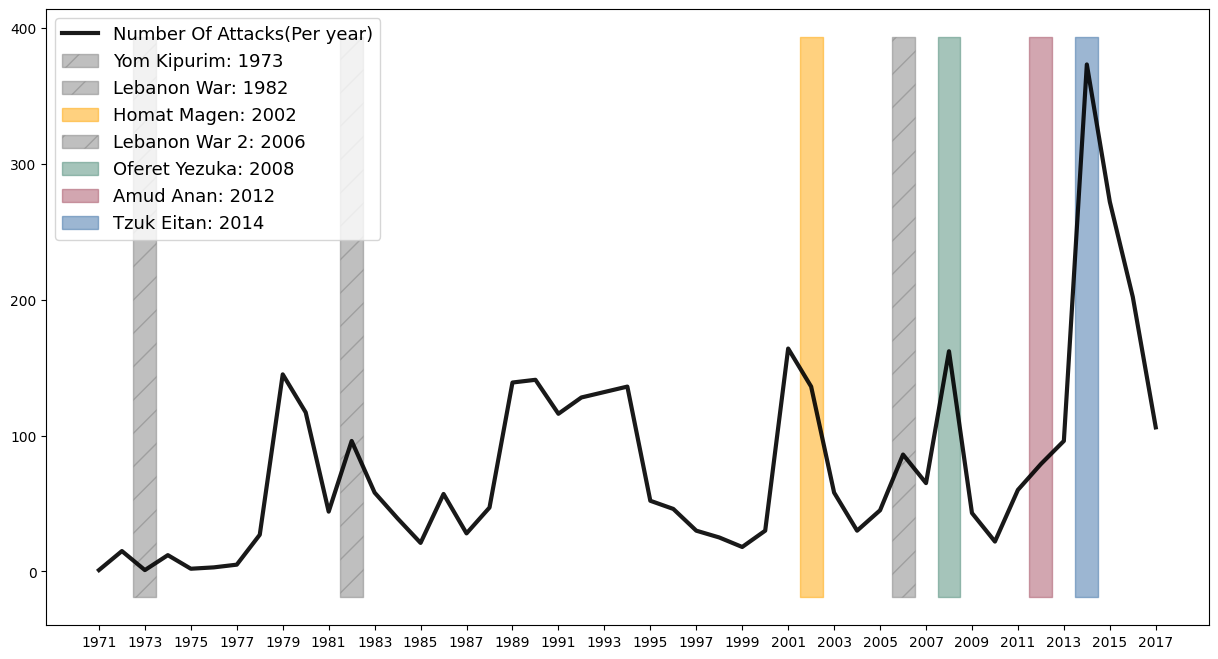

In [12]:
# Question - Does war in israel contribute to terror attacks against israeli citizents inside and abroad?
# We want to show the amount of terror attacks

# Calclate attacks per year
attacks = israel_attacks.groupby(['iyear']).aggregate(attacks=('iyear', 'count'))
attacks.reset_index(inplace=True)

# Show plot
plt.subplots(figsize=(15, 8))
plt.plot(attacks['iyear'], attacks['attacks'], label='Number Of Attacks(Per year)', color='black', linewidth=3, alpha=0.9)
#plt.title('Attacks During Israeli Wars')

# Adjust amount of years shown
plt.xticks(np.arange(min(attacks['iyear']), max(attacks['iyear'])+1, 2))

# Show all wars in timeframes - From 1970 since this is all the data we have
israeli_wars = wars[wars['start'] > 1970]
for index, war in enumerate(israeli_wars.index.to_list()):
    war_details = wars.loc[war]
    start, end, war_type = war_details[['start', 'end', 'type']]

    # Set label
    label = None
    if start == end:
        label = f"{war}: {start}"
    else:
        label = f"{war}: {start}-{end}"

    # Create war timeframe
    y1 = min(attacks['attacks']) - 20
    y2 = max(attacks['attacks']) + 20

    color = tf_colors[index]
    hatch = None
    if war_type == 'Out':
        color = 'grey'
        hatch = '/'

    # Adjust years
    if end - start < 2:
        start -= 0.5
        end += 0.5

    plt.fill_between(x=[start, end], y1=y1, y2=y2, color=color, alpha=0.5, label=label, hatch=hatch)

plt.legend(loc='upper left', fontsize='13')
plt.savefig('Pictures/pattern_wars.png', bbox_inches='tight', transparent=True)
plt.show();

# Conclusion - We can see pretty clearly that terror attacks against israeli citizens have almost always risen to some peak 
# Probably making the war start in the first place. A war has always caused some time with less terror attacks, yet it almost always
# started rising some time later, eventually causing a temporary "quiet time" before terror attacks started again.

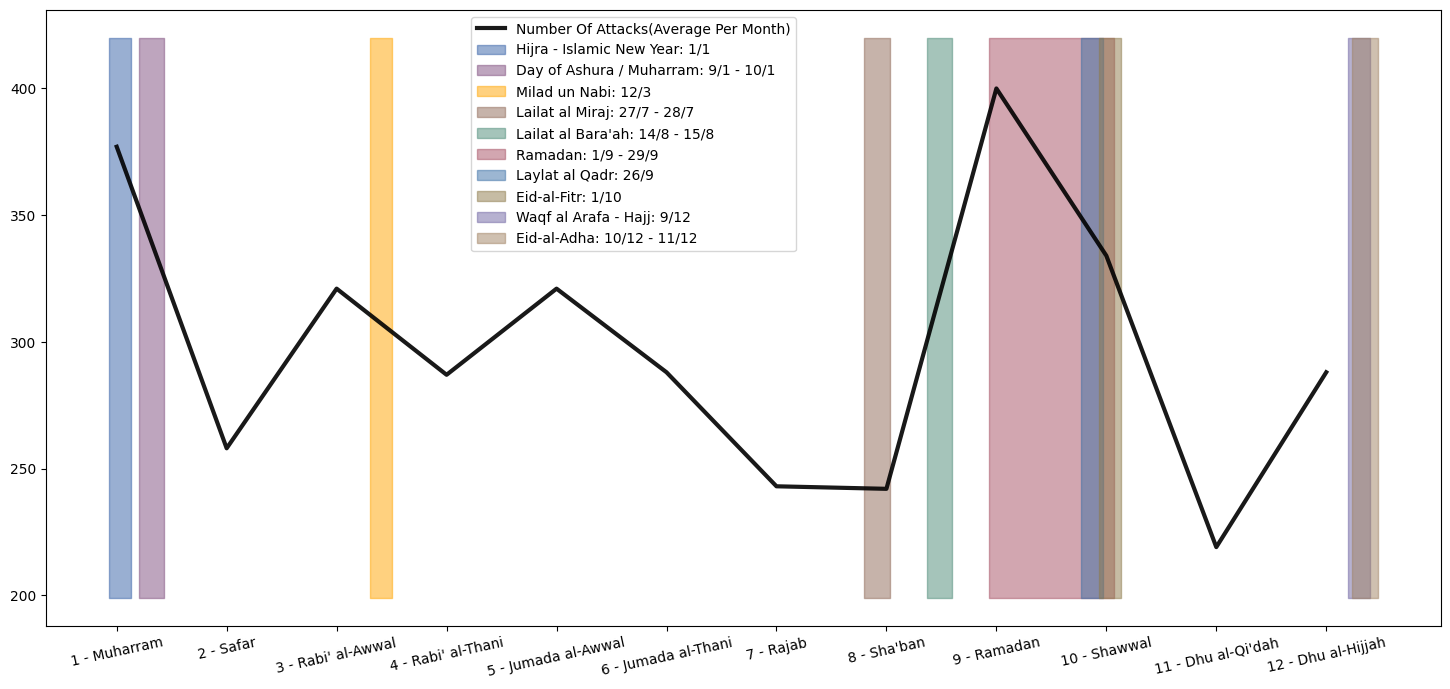

In [24]:
# Question - Does islamic holidays contribute to terror attacks in israel
# We want to show the amount of terror attacks

attacks = israel_attacks.copy()

# Convert all dates to hijri dates(islamic calendar)
for attack in attacks.index.to_list():
    year, month, day = attacks.loc[attack, ['iyear', 'imonth', 'iday']]
    hijri_date = hijri_convert.Gregorian(year, month, day).to_hijri()
    attacks.loc[attack, 'hijri_month'] = hijri_date.month

# Calclate attacks per year
attacks = attacks.groupby(['hijri_month']).aggregate(attacks=('hijri_month', 'count'))
attacks.reset_index(inplace=True)

# Show plot
plt.subplots(figsize=(18, 8))
plt.plot(attacks['hijri_month'], attacks['attacks'], label='Number Of Attacks(Average Per Month)', color='black', linewidth=3, alpha=0.9)
#plt.title('Attacks During Islamic Holidays')

# Show all islamic holidays
for index, holiday in enumerate(islam_holidays.index.to_list()):
    holiday_details = islam_holidays.loc[holiday]
    start, end = holiday_details[['start_date', 'end_date']]

    # Calculate hijri dates
    hijri_start = hijri_convert.Gregorian(pd.Timestamp(start).year, pd.Timestamp(start).month, pd.Timestamp(start).day).to_hijri()
    hijri_end = hijri_convert.Gregorian(pd.Timestamp(end).year, pd.Timestamp(end).month, pd.Timestamp(end).day).to_hijri()

    # Set label
    label = None
    if hijri_start == hijri_end:
        label = f"{holiday}: {hijri_start.day}/{hijri_start.month}"
    else:
        label = f"{holiday}: {hijri_start.day}/{hijri_start.month} - {hijri_end.day}/{hijri_end.month}"

    # Calculate start and end
    start = hijri_start.month + (hijri_start.day / 30)
    end = hijri_end.month + (hijri_end.day / 30)

    # Create war timeframe
    y1 = min(attacks['attacks']) - 20
    y2 = max(attacks['attacks']) + 20

    # Adjust months
    if end - start < 2:
        start -= 0.1
        end += 0.1

    # Plot timeframe
    plt.fill_between(x=[start, end], y1=y1, y2=y2, color=tf_colors[index], alpha=0.5, label=label)
        
# Adjust amount of years shown
hijri_months = [
    "1 - Muharram",
    "2 - Safar",
    "3 - Rabi' al-Awwal",
    "4 - Rabi' al-Thani",
    "5 - Jumada al-Awwal",
    "6 - Jumada al-Thani",
    "7 - Rajab",
    "8 - Sha'ban",
    "9 - Ramadan",
    "10 - Shawwal",
    "11 - Dhu al-Qi'dah",
    "12 - Dhu al-Hijjah"
]
plt.xticks(np.arange(min(attacks['hijri_month']), max(attacks['hijri_month'])+1, 1), hijri_months, rotation=12.25)

plt.legend(loc='upper left', bbox_to_anchor=(0.3, 1))
plt.savefig('Pictures/pattern_islamic_holidays.png', bbox_inches='tight', transparent=True)
plt.show();

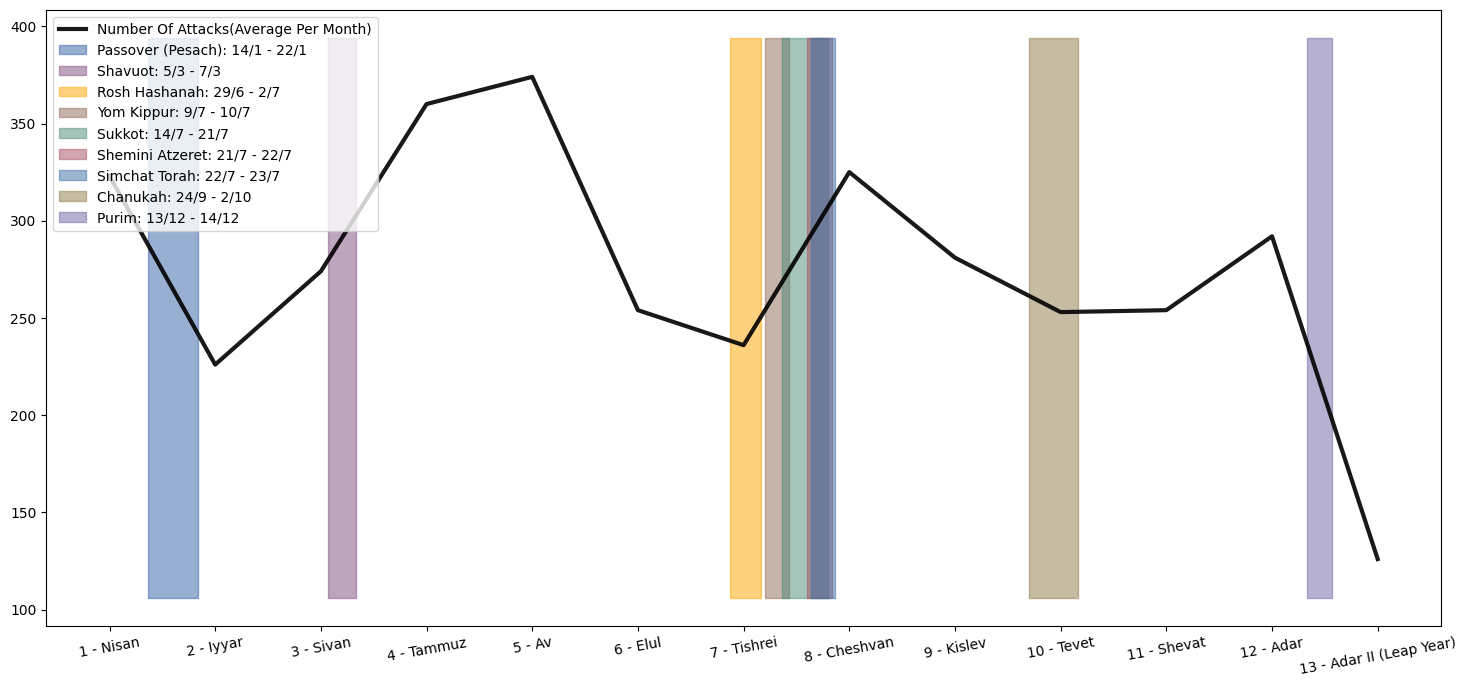

In [14]:
# Question - Does jewish holidays contribute to terror attacks in israel
# We want to show the amount of terror attacks

attacks = israel_attacks.copy()

# Convert all dates to hebrew dates(islamic calendar)
for attack in attacks.index.to_list():
    year, month, day = attacks.loc[attack, ['iyear', 'imonth', 'iday']]
    hebrew_date = hebrew_convert.GregorianDate(year, month, day).to_heb()
    attacks.loc[attack, 'hebrew_month'] = hebrew_date.month

# Calclate attacks per year
attacks = attacks.groupby(['hebrew_month']).aggregate(attacks=('hebrew_month', 'count'))
attacks.reset_index(inplace=True)

# Show plot
plt.subplots(figsize=(18, 8))
plt.plot(attacks['hebrew_month'], attacks['attacks'], label='Number Of Attacks(Average Per Month)',  color='black', linewidth=3, alpha=0.9)
#plt.title('Attacks During Jewish Holidays')

# Show all hebrew holidays
for index, holiday in enumerate(jewish_holidays.index.to_list()):
    holiday_details = jewish_holidays.loc[holiday]
    start, end = holiday_details[['start_date', 'end_date']]

    # Calculate hijri dates
    hebrew_start = hebrew_convert.GregorianDate(pd.Timestamp(start).year, pd.Timestamp(start).month, pd.Timestamp(start).day).to_heb()
    hebrew_end = hebrew_convert.GregorianDate(pd.Timestamp(end).year, pd.Timestamp(end).month, pd.Timestamp(end).day).to_heb()

    # Set label
    label = None
    if hebrew_start == hebrew_end:
        label = f"{holiday}: {hebrew_start.day}/{hebrew_start.month}"
    else:
        label = f"{holiday}: {hebrew_start.day}/{hebrew_start.month} - {hebrew_end.day}/{hebrew_end.month}"

    # Calculate start and end
    start = hebrew_start.month + (hebrew_start.day / 30)
    end = hebrew_end.month + (hebrew_end.day / 30)

    # Create war timeframe
    y1 = min(attacks['attacks']) - 20
    y2 = max(attacks['attacks']) + 20

    # Adjust months
    if end - start < 2:
        start -= 0.1
        end += 0.1

    # Plot timeframe
    plt.fill_between(x=[start, end], y1=y1, y2=y2, color=tf_colors[index], alpha=0.5, label=label)

# Adjust amount of years shown
hebrew_months = [
    "1 - Nisan",
    "2 - Iyyar",
    "3 - Sivan",
    "4 - Tammuz",
    "5 - Av",
    "6 - Elul",
    "7 - Tishrei",
    "8 - Cheshvan",
    "9 - Kislev",
    "10 - Tevet",
    "11 - Shevat",
    "12 - Adar",
    "13 - Adar II (Leap Year)"
]
plt.xticks(np.arange(min(attacks['hebrew_month']), max(attacks['hebrew_month'])+1, 1), hebrew_months, rotation=10)

plt.legend(loc='upper left')
plt.savefig('Pictures/pattern_jewish_holidays.png', bbox_inches='tight', transparent=True)
plt.show();

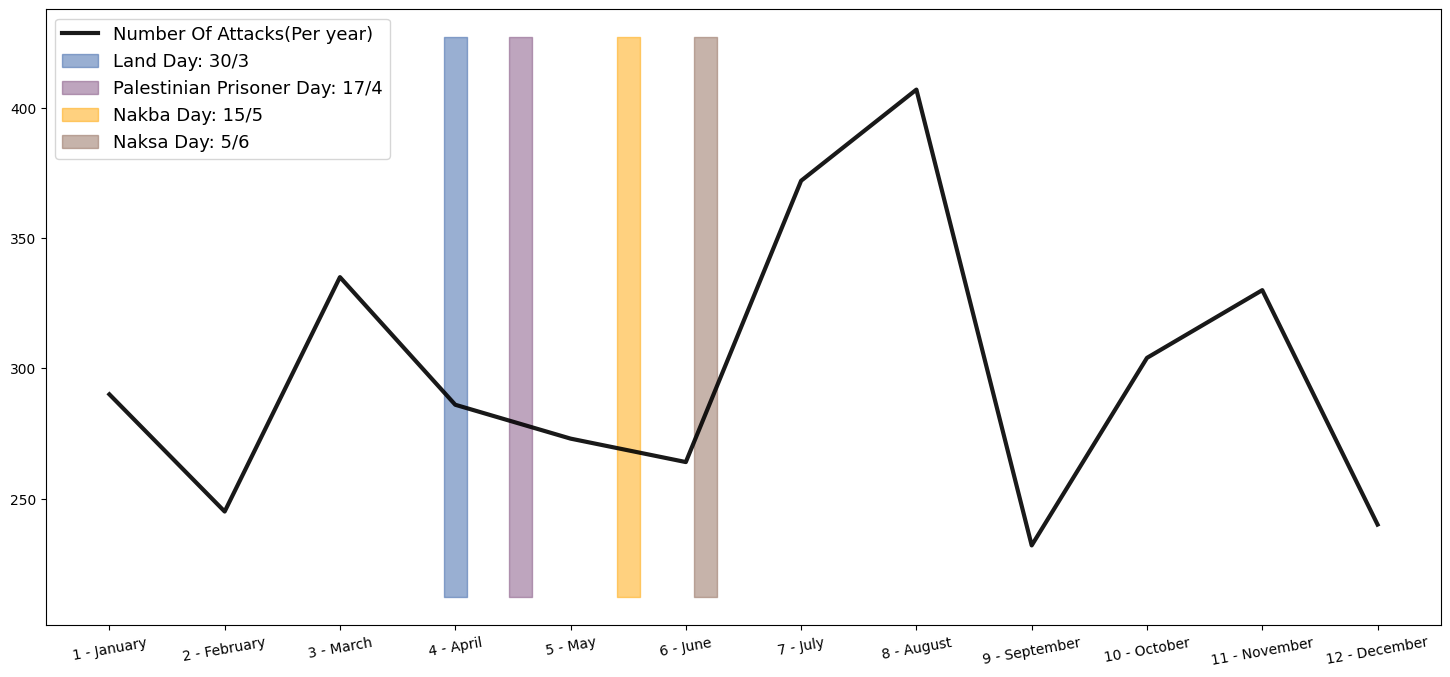

In [15]:
# Do palestinians national days contribute to terror attacks?
attacks = israel_attacks.copy()

# Calclate attacks per year
attacks = attacks.groupby(['imonth']).aggregate(attacks=('imonth', 'count'))
attacks.reset_index(inplace=True)

# Show plot
plt.subplots(figsize=(18, 8))
plt.plot(attacks['imonth'], attacks['attacks'], label='Number Of Attacks(Per year)', color='black', linewidth=3, alpha=0.9)
#plt.title('Attacks During Palestinian National Days')

# Show palestinial national days
for index, national_day in enumerate(pales_national_days.index.to_list()):
    national_day_details = pales_national_days.loc[national_day]
    start, end = national_day_details[['start_date', 'end_date']]

    # Set label
    label = None
    if start == end:
        label = f"{national_day}: {pd.Timestamp(start).day}/{pd.Timestamp(start).month}"
    else:
        label = f"{national_day}: {pd.Timestamp(start).day}/{pd.Timestamp(start).month}-{pd.Timestamp(end).day}/{pd.Timestamp(end).month}"
    
    # Calculate start and end
    start = pd.Timestamp(start).month + (pd.Timestamp(start).day / 30)
    end = pd.Timestamp(end).month + (pd.Timestamp(end).day / 30)

    # Create war timeframe
    y1 = min(attacks['attacks']) - 20
    y2 = max(attacks['attacks']) + 20

    # Adjust months
    if end - start < 2:
        start -= 0.1
        end += 0.1

    plt.fill_between(x=[start, end], y1=y1, y2=y2, color=tf_colors[index], alpha=0.5, label=label)

# Adjust months names
gregorian_months = [
    '1 - January',
    '2 - February',
    '3 - March',
    '4 - April',
    '5 - May',
    '6 - June',
    '7 - July',
    '8 - August',
    '9 - September',
    '10 - October',
    '11 - November',
    '12 - December'
]
plt.xticks(np.arange(min(attacks['imonth']), max(attacks['imonth'])+1, 1), gregorian_months, rotation=10)

plt.legend(loc='upper left', fontsize='13')
plt.savefig('Pictures/pattern_pales_national_days.png', bbox_inches='tight', transparent=True)
plt.show();

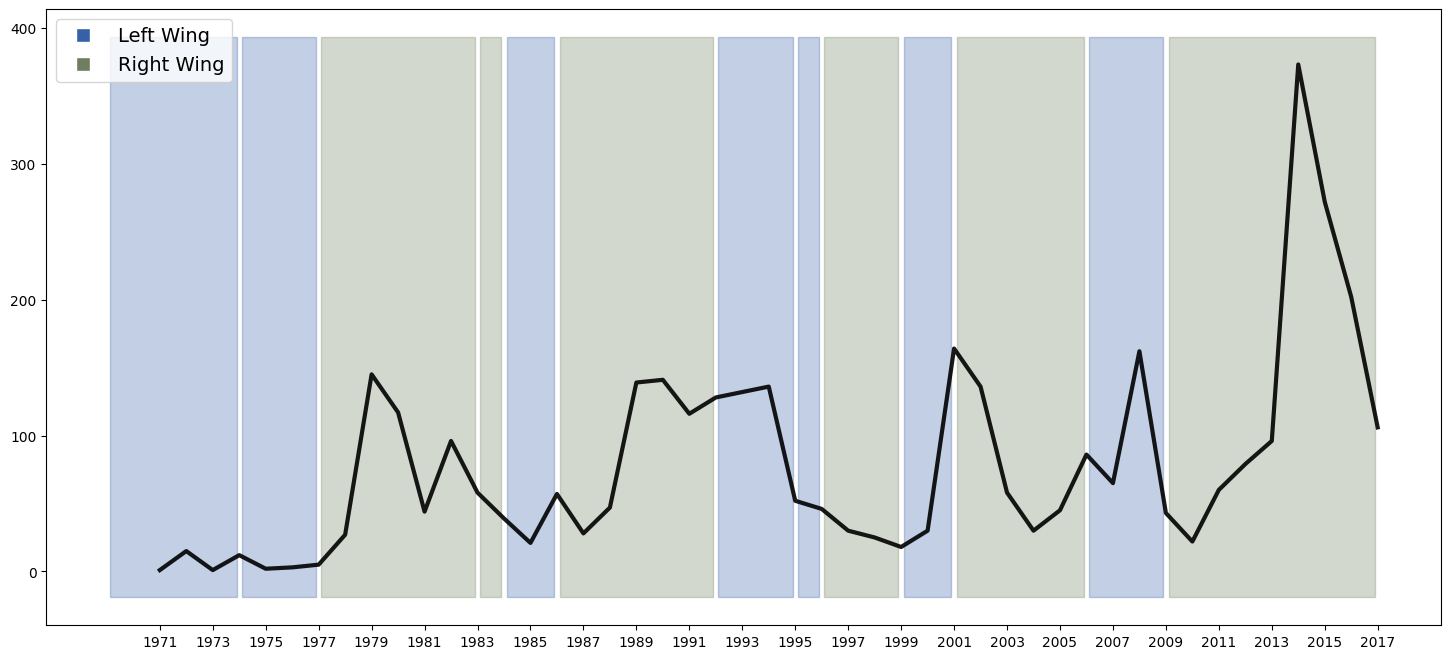

In [20]:
# Question - Does the regime in israel contribute to terror attacks?
# We want to show the amount of terror attacks

attacks = israel_attacks.copy()

# Calclate attacks per year
attacks = attacks.groupby(['iyear']).aggregate(attacks=('iyear', 'count'))
attacks.reset_index(inplace=True)

# Show plot
plt.subplots(figsize=(18, 8))
plt.plot(attacks['iyear'], attacks['attacks'], label='Number Of Attacks(Per year)', color='black', linewidth=3, alpha=0.9)
#plt.title('Attacks Under Different Government Regimes(Left-Blue, Right-Red)')

# Adjust amount of years shown
plt.xticks(np.arange(min(attacks['iyear']), max(attacks['iyear'])+1, 2))

# Show all prime ministers in timeframe
wing_colors = ['#3561A7', '#6e7e5e']

for index in range(len(prime_ministers)):
    prime_minister_details = prime_ministers.loc[index]
    name, start, end, wing = prime_minister_details[['prime_minister', 'time_started', 'time_ended', 'wing']]

    # Set start and end
    start = start.year
    end = end.year

    # Set label
    # label = None
    # if start == end:
    #     label = f"{name}: {start}"
    # else:
    #     label = f"{name}: {start}-{end}"

    # Create war timeframe
    y1 = min(attacks['attacks']) - 20
    y2 = max(attacks['attacks']) + 20

    # Determine wing color
    color = wing_colors[0] if wing == 'Left' else wing_colors[1]

    # Adjust time frame
    start += 0.1
    end -= 0.1

    plt.fill_between(x=[start, end], y1=y1, y2=y2, color=color, alpha=0.3)

# Set custom legend
# Custom legend labels and colors
legend_data = {'Left Wing': wing_colors[0], 'Right Wing': wing_colors[1]}

# Create handles and labels for custom legend
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in legend_data.values()]
labels = legend_data.keys()

# Show custom legend with preset values and colors
plt.legend(handles, labels, loc='upper left', fontsize='14')

plt.savefig('Pictures/pattern_government_rule.png', bbox_inches='tight', transparent=True)
plt.show();